# USA Housing Value Regression

Dalam notebook ini, saya akan membuat regresi dari harga USA Housing berdasarkan fitur-fitur yaitu :

1) Avg. Area Income : Rata-rata luas rumah

2) Avg. Area House Age : Rata-rata umur rumah

3) Avg. Area Number of Rooms : Rata-rata jumlah ruangan

4) Avg. Area Number of Bedrooms : Rata-rata jumlah kamar

5) Area Population : Rata-rata populasi

6) Price : Harga rumah

7) Address : Alamat rumah

## Data Pre-Processing

In [1]:
# Import Modul yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Import dataset
df = pd.read_csv('USA_Housing.csv')

In [3]:
# Melihat dataset
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Kolom dari dataset
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

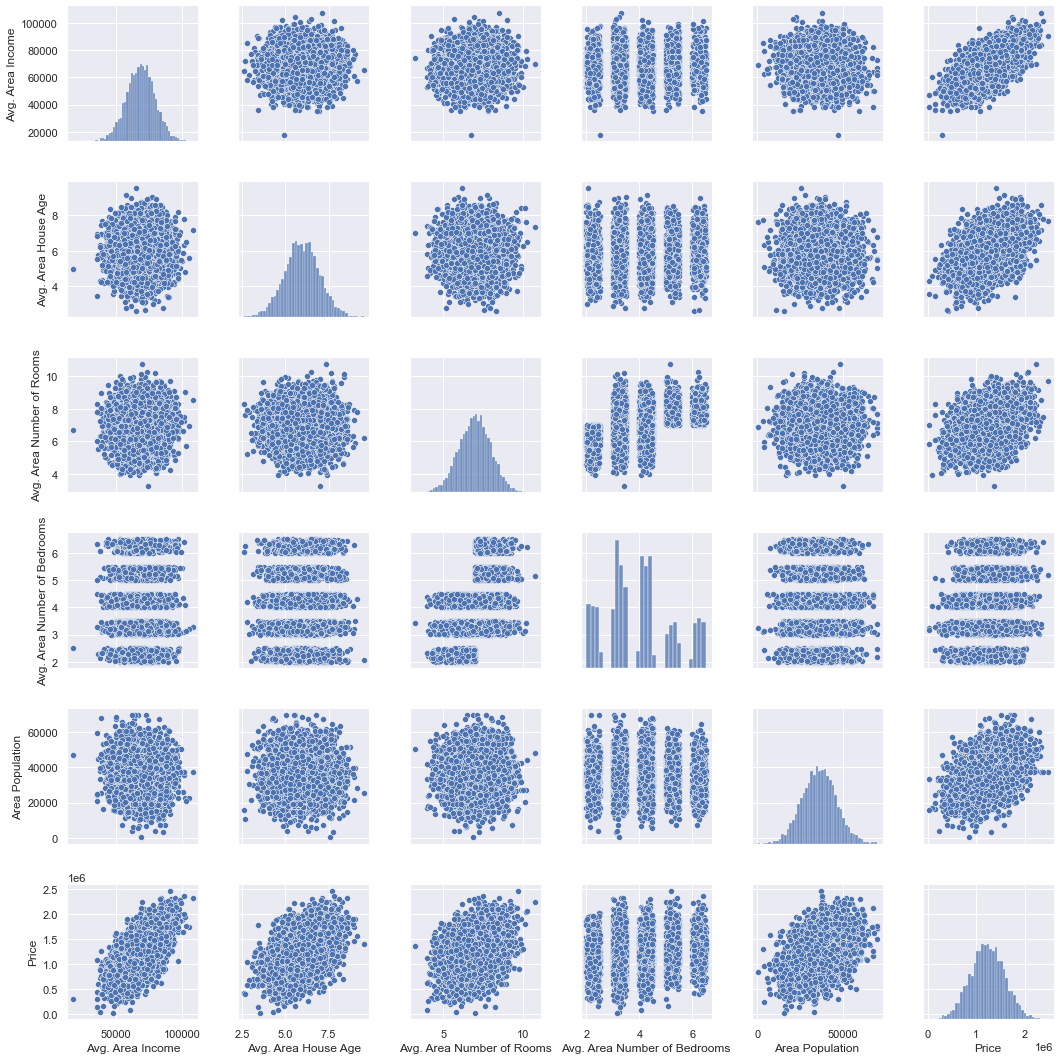

In [6]:
sns.pairplot(df)

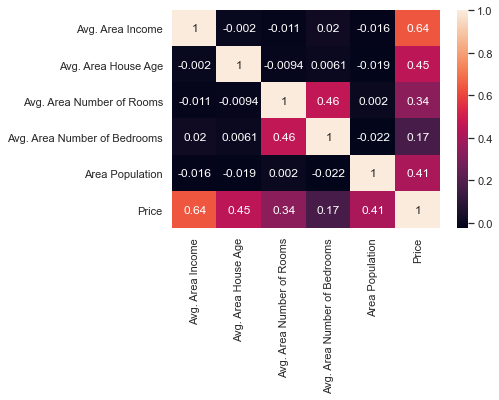

In [7]:
# Korelasi antar fitur
sns.heatmap(df.corr(), annot=True)

## Train Test Split

In [6]:
X = df.drop(columns=['Address','Price'], axis=1)
y = df['Price']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn import datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
y_test = pd.DataFrame(y_test)

In [10]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1840,55245.337288,3.965745,8.961106,4.38,43557.943435
2115,62305.638407,6.490769,7.647362,3.19,47066.617420
4437,77345.472379,5.407515,8.243178,3.11,26706.911029
1146,65846.171039,6.385374,6.804131,3.18,28214.363551
2486,69350.793357,6.910415,8.288048,4.29,36779.058567
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


## Multi Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [12]:
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

# Fit and make the predictions by the model
mlr = sm.OLS(y_train, X_train2).fit() # Ordinary least squares
predictions = mlr.predict(X_test2)

# Print out the statistics
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     7960.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:16:05   Log-Likelihood:                -45311.
No. Observations:                3500   AIC:                         9.063e+04
Df Residuals:                    3494   BIC:                         9.067e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.639e+06   2.04e+04   -129.578      0.000   -2.68e+06    -2.6e+06
Avg. Area Income                21.6258      0.160    135.484      0.000      21.313      21.939
Avg. Area House Age           1.656e+05   1734.455     95.471      0.000    1.62e+05    1.69e+05
Avg. Area Number of Rooms     1.198e+05   1919.359     62.431      0.000    1.16e+05    1.24e+05
Avg. Area Number of Bedrooms  2361.0953   1584.056      1.491      0.136    -744.673    5466.864
Area Population                 15.2166      0.173     88.122      0.000      14.878      15.555
==============================================================================
Omnibus:                        3.821   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.443
Skew:                          -0.004   Prob(JB):                        0.179
Kurtosis:                       2.847   Cond. No.                     9.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
coeff_df = pd.DataFrame(model_lr.coef_,X.columns,columns=['Coefficient'])

In [16]:
coeff_df

,Coefficient
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


In [18]:
predictions = model_lr.predict(X_test)

In [19]:
predictions

array([1308536.13592621, 1237122.72746477, 1243835.62817067, ...,
       1457119.79297243, 1483428.9530937 , 1047510.59737177])

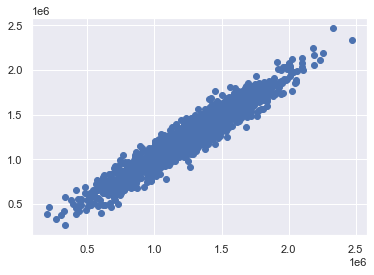

In [20]:
plt.scatter(y_test, predictions)

Feature: 0, Score: 21.62580
Feature: 1, Score: 165590.39275
Feature: 2, Score: 119827.78339
Feature: 3, Score: 2361.09526
Feature: 4, Score: 15.21658


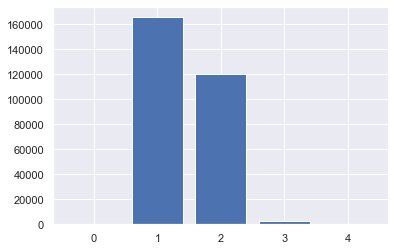

In [51]:
from matplotlib import pyplot
# get importance
importance = model_lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [22]:
# Melihat hasil metric Training
y_pred_mlr = model_lr.predict(X_train)
print('MSE :', metrics.mean_squared_error(y_train, y_pred_mlr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_mlr)))
print('MAE :', metrics.mean_absolute_error(y_train, y_pred_mlr))
print('R^2 :', model_lr.score(X_train,y_train))
acc_mlr2 = model_lr.score(X_train, y_train)

MSE : 10287043161.197224
RMSE : 101425.06180031257
MAE : 81480.4997317492
R^2 : 0.9192986579075526


In [24]:
# Melihat hasil metric Testing
y_pred_mlr_2 = model_lr.predict(X_test)
print('MSE :', metrics.mean_squared_error(y_test, y_pred_mlr_2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_2)))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_mlr_2))
print('R^2 :', model_lr.score(X_test,y_test))
acc_mlr2 = model_lr.score(X_test, y_test)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_2))

MSE : 10068422551.401056
RMSE : 100341.52954485524
MAE : 81135.56609336862
R^2 : 0.9146818498754001


In [25]:
compare_mlr = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_mlr_2, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['price']-compare_mlr['Prediction']
compare_mlr.head(10)

,Price,Prediction
0,1.339096e+06,1.308536e+06
1,1.251794e+06,1.237123e+06
2,1.340095e+06,1.243836e+06
3,1.431508e+06,1.229242e+06
4,1.042374e+06,1.059353e+06
5,1.555321e+06,1.542359e+06
6,1.250882e+06,1.095211e+06
7,1.039381e+06,8.326763e+05
8,8.324752e+05,7.889063e+05
9,1.420648e+06,1.468528e+06


In [26]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_mlr['Price']-compare_mlr['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9451295775874717
Little to no autocorrelation 

Assumption satisfied


In [27]:
#Cek Multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif["features"] = X_train2.columns
vif

,VIF Factor,features
0,140.844985,const
1,1.001784,Avg. Area Income
2,1.000308,Avg. Area House Age
3,1.278185,Avg. Area Number of Rooms
4,1.279345,Avg. Area Number of Bedrooms
5,1.000624,Area Population


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.24231847930852426
Residuals are normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


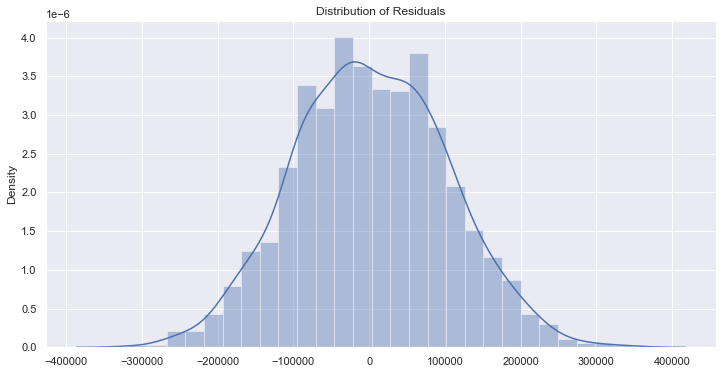


Assumption satisfied


In [28]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_mlr['Price']-compare_mlr['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_mlr['Price']-compare_mlr['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

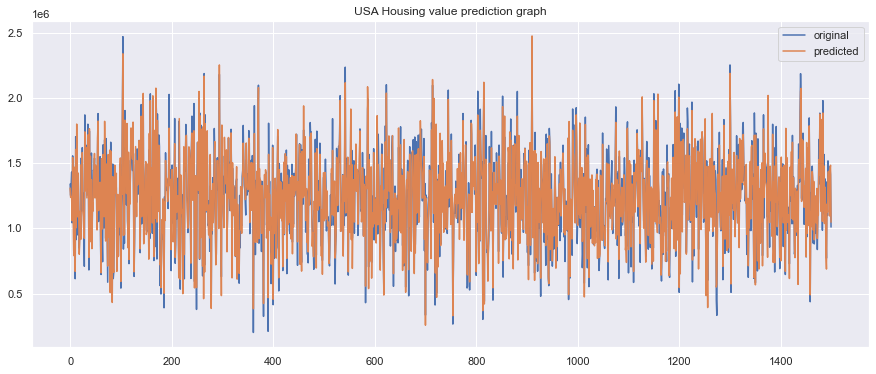

In [29]:
# Melihat hasil perbandingan actual dengan prediksi
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_mlr_2, label="predicted")
plt.title("USA Housing value prediction graph")
plt.legend()
plt.show()

## Random Forest Regression

In [30]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
# Model prediction on train data
y_pred_rfg = reg.predict(X_train)
# Model Evaluation Training
print('R^2:',metrics.r2_score(y_train, y_pred_rfg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rfg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rfg)))

R^2: 0.9837301342083834
Adjusted R^2: 0.9837068516299753
MAE: 35894.41050468856
MSE: 2073928478.5811484
RMSE: 45540.40490137465


In [33]:
# Prediksi tes data dengan model
y_test_pred_rfg = reg.predict(X_test)
# Model Evaluation Testing
acc_rf = metrics.r2_score(y_test, y_test_pred_rfg)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg)))
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg))

R^2: 0.8794034711133328
Adjusted R^2: 0.8789998682723467
MAE: 94637.4986186746
MSE: 14231635464.31736
RMSE: 119296.41848906178


Feature: 0, Score: 0.43581
Feature: 1, Score: 0.23694
Feature: 2, Score: 0.12145
Feature: 3, Score: 0.01799
Feature: 4, Score: 0.18781


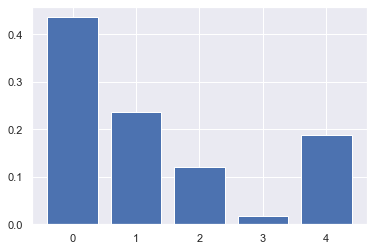

In [52]:
# get importance
importance = reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [34]:
compare_rfg = y_test.reset_index(drop = True).join(pd.DataFrame(y_test_pred_rfg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Price']-compare_mlr['Prediction']
compare_rfg.head(20)

,Price,Prediction
0,1.339096e+06,1.329235e+06
1,1.251794e+06,1.231656e+06
2,1.340095e+06,1.260429e+06
3,1.431508e+06,1.261052e+06
4,1.042374e+06,1.152784e+06
5,1.555321e+06,1.518281e+06
6,1.250882e+06,1.021897e+06
7,1.039381e+06,8.395323e+05
8,8.324752e+05,8.344106e+05
9,1.420648e+06,1.460612e+06


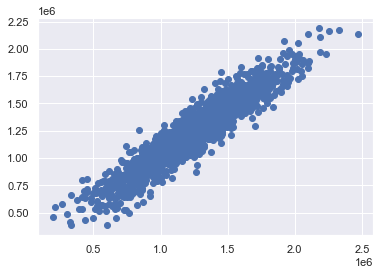

In [35]:
plt.scatter(y_test, y_test_pred_rfg)

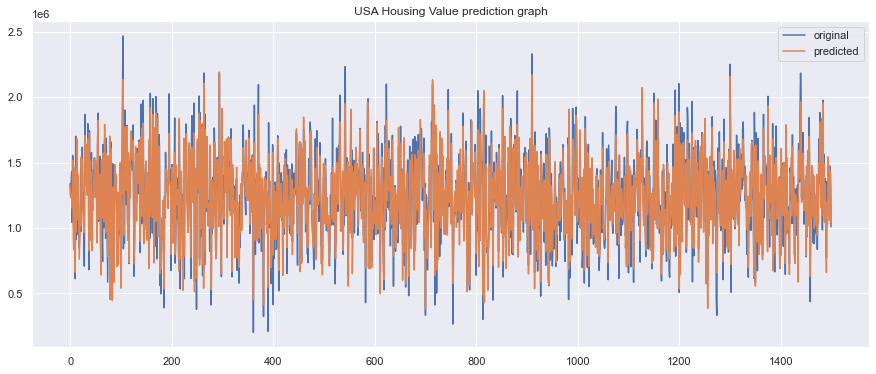

In [36]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_rfg, label="predicted")
plt.title("USA Housing Value prediction graph")
plt.legend()
plt.show()

In [37]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_rfg['Price']-compare_rfg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9275015655810732
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.9021260929604009
Residuals are normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


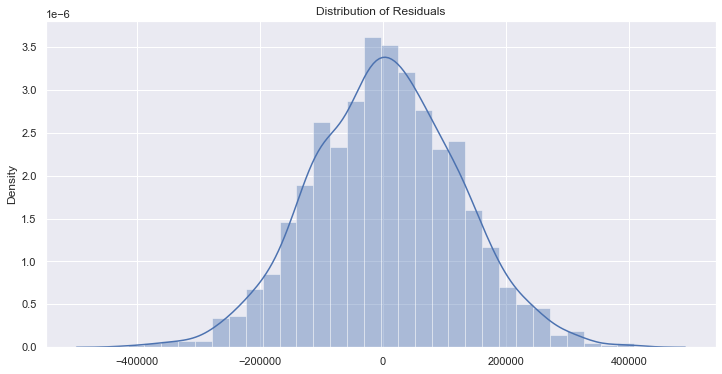


Assumption satisfied


In [38]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_rfg['Price']-compare_rfg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_rfg['Price']-compare_rfg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

## XGBOOST Regressor

In [39]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbreg = XGBRegressor()

# Train the model using the training sets 
xbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
# Model prediction on train data
y_pred_xg = xbreg.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

R^2: 0.9805460372621706
Adjusted R^2: 0.9805181981626603
MAE: 37311.9823624324
MSE: 2479807016.2342772
RMSE: 49797.660750624396


E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [41]:
# Prediksi tes data dengan model
y_test_pred_xg = xbreg.predict(X_test)
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_xg)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg)))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg))

R^2: 0.8705501144719521
Adjusted R^2: 0.8701168819233307
MAE: 97291.96544877713
MSE: 15276422951.311562
RMSE: 123597.82745384953


E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Feature: 0, Score: 0.37672
Feature: 1, Score: 0.25073
Feature: 2, Score: 0.12351
Feature: 3, Score: 0.01459
Feature: 4, Score: 0.23445


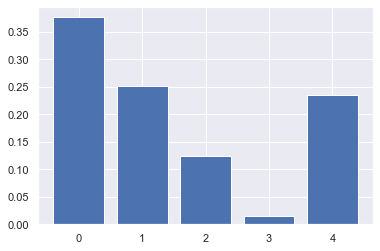

In [53]:
# get importance
importance = xbreg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [54]:
compare_xg = y_test.reset_index(drop = True).join(pd.DataFrame(y_test_pred_xg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Price']-compare_mlr['Prediction']
compare_xg.head(20)

,Price,Prediction
0,1.339096e+06,1.332898e+06
1,1.251794e+06,1.273360e+06
2,1.340095e+06,1.261135e+06
3,1.431508e+06,1.253937e+06
4,1.042374e+06,9.643099e+05
5,1.555321e+06,1.624476e+06
6,1.250882e+06,1.092244e+06
7,1.039381e+06,8.171514e+05
8,8.324752e+05,8.440941e+05
9,1.420648e+06,1.476537e+06


In [43]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_xg['Price']-compare_xg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9940508166805824
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.26370311198394425
Residuals are normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


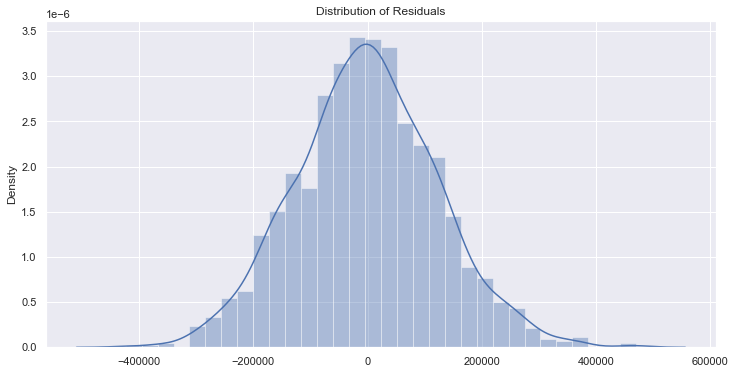


Assumption satisfied


In [44]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_xg['Price']-compare_xg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_xg['Price']-compare_xg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

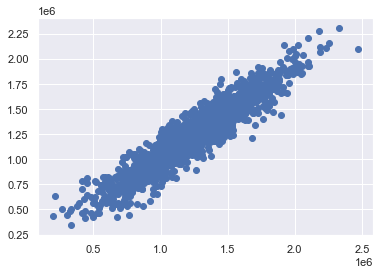

In [45]:
plt.scatter(y_test, y_test_pred_xg)

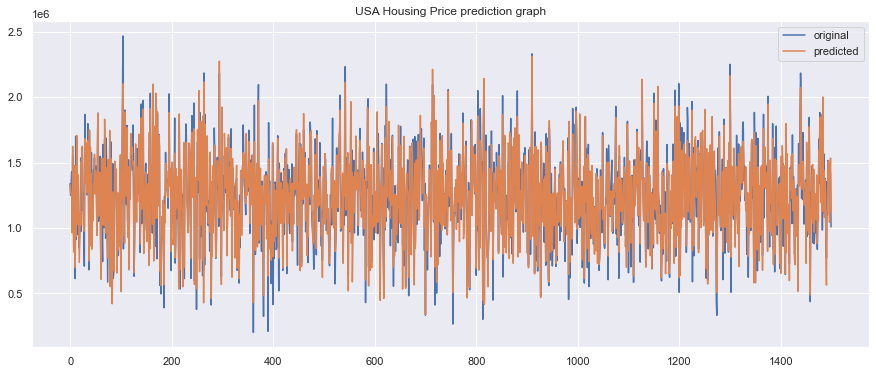

In [46]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xg, label="predicted")
plt.title("USA Housing Price prediction graph")
plt.legend()
plt.show()

## Summary

In [47]:
# Membandingkan hasil dari modelling yang sudah dilakukan
models = pd.DataFrame({
    'Model': ['Multi Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_mlr2*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
0,Multi Linear Regression,91.468185
1,Random Forest,87.940347
2,XGBoost,87.055011


In [49]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest', 'XGBoost'],
    'RMSE Score': [rmse_lr, rmse_rf, rmse_xgb]})
models.sort_values(by='RMSE Score', ascending=True)

,Model,RMSE Score
0,Linear Regression,100341.529545
1,Random Forest,119296.418489
2,XGBoost,123597.827454


Berdasarkan hasil evaluasi modelling dari 3 model yang dilakukan, berdasarkan R^2 dan RMSE, model terbaik yang bisa dipakai adalah :
## Multi Linear Regression